In [1]:
from tensorflow import keras

from tensorflow.keras.preprocessing import image

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from  tensorflow.keras.utils import img_to_array             # tensorflow.keras.utils              

from tensorflow.keras.optimizers import RMSprop

import tensorflow as tf             #importing the tensor flow Library

import numpy as np                  #import the numpy Library

import matplotlib.pyplot as plt     #import the matplotlib library

import cv2                           #import the opencv Library

import os

import PIL.Image

from tensorflow.keras.layers import BatchNormalization

from sklearn.metrics import classification_report, confusion_matrix 
import itertools

from sklearn.metrics import make_scorer

from sklearn.metrics import accuracy_score, precision_score, recall_score

from keras.wrappers.scikit_learn import KerasClassifier

In [3]:
img=image.load_img(r"C:\Users\Dell\Yt_proj\Deep_learning\types\test\suv\suv48.jpg")

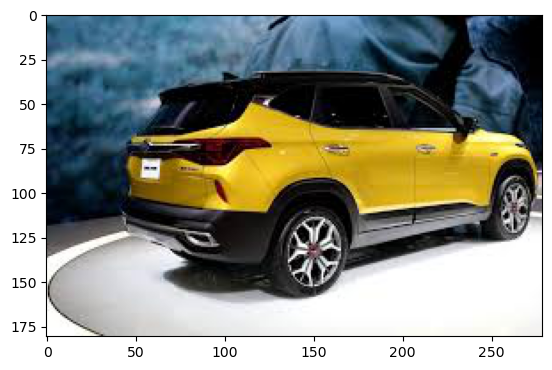

In [4]:

plt.imshow(img)

In [5]:
cv2.imread(r"C:\Users\Dell\Yt_proj\Deep_learning\types\test\suv\suv48.jpg").shape

(181, 279, 3)

In [6]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)
test=ImageDataGenerator(rescale=1/255)

In [9]:
train_dataset=train.flow_from_directory(r"C:\Users\Dell\Yt_proj\Deep_learning\types\train",
                                   target_size=(180,270),
                                   batch_size=16,
                                   class_mode='categorical')

validation_dataset=train.flow_from_directory(r"C:\Users\Dell\Yt_proj\Deep_learning\types\validation",
                                        target_size=(180,270),
                                        batch_size=16,
                                        class_mode='categorical',shuffle=False)

test_dataset=train.flow_from_directory(r"C:\Users\Dell\Yt_proj\Deep_learning\types\test",
                                  target_size=(180,270),
                                  batch_size=16,
                                  class_mode='categorical',shuffle=False)

Found 264 images belonging to 4 classes.
Found 72 images belonging to 4 classes.
Found 130 images belonging to 4 classes.


In [10]:
classes=train_dataset.class_indices
classes


{'mini_van': 0, 'pickup': 1, 'sedan': 2, 'suv': 3}

In [11]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [12]:
model  = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3), activation = 'relu',input_shape=(180, 270, 3)),
                                tf.keras.layers.MaxPool2D((2,2)),

                                tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
                                tf.keras.layers.MaxPool2D(2,2),

                                tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
                                tf.keras.layers.MaxPool2D(2,2), 

                               # tf.keras.layers.Conv2D(128,(3,3), activation = 'relu'),
                               # tf.keras.layers.MaxPool2D(2,2),
                               # BatchNormalization(),

                                tf.keras.layers.Flatten(),

                                tf.keras.layers.Dense(512,activation = 'relu'),

                                tf.keras.layers.Dense(4,activation = 'softmax')

                                ])

model.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(0.001),
              metrics = ['accuracy'])
model.save('vehical_type.model')


INFO:tensorflow:Assets written to: vehical_type.model\assets


INFO:tensorflow:Assets written to: vehical_type.model\assets


In [13]:
callbacks_list = [
                    keras.callbacks.ModelCheckpoint(filepath='vehical_color.model',monitor='val_loss', save_best_only=True, verbose=1),
                                                    keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,verbose=1)
                 ]

In [14]:
model_fit=model.fit(train_dataset,steps_per_epoch=6,epochs=50,validation_data=validation_dataset,callbacks=callbacks_list )

Epoch 1/50
6/6 [==============================] - ETA: 0s - loss: 8.2118 - accuracy: 0.2500
Epoch 1: val_loss improved from inf to 1.32076, saving model to vehical_color.model


INFO:tensorflow:Assets written to: vehical_color.model\assets


INFO:tensorflow:Assets written to: vehical_color.model\assets


6/6 [==============================] - 15s 2s/step - loss: 8.2118 - accuracy: 0.2500 - val_loss: 1.3208 - val_accuracy: 0.4306
Epoch 2/50
6/6 [==============================] - ETA: 0s - loss: 1.3448 - accuracy: 0.3333
Epoch 2: val_loss did not improve from 1.32076
6/6 [==============================] - 3s 474ms/step - loss: 1.3448 - accuracy: 0.3333 - val_loss: 1.3870 - val_accuracy: 0.1806
Epoch 3/50
6/6 [==============================] - ETA: 0s - loss: 1.3375 - accuracy: 0.3295
Epoch 3: val_loss improved from 1.32076 to 1.31988, saving model to vehical_color.model


INFO:tensorflow:Assets written to: vehical_color.model\assets


INFO:tensorflow:Assets written to: vehical_color.model\assets


6/6 [==============================] - 8s 2s/step - loss: 1.3375 - accuracy: 0.3295 - val_loss: 1.3199 - val_accuracy: 0.3472
Epoch 4/50
6/6 [==============================] - ETA: 0s - loss: 1.1444 - accuracy: 0.5208
Epoch 4: val_loss improved from 1.31988 to 1.24786, saving model to vehical_color.model


INFO:tensorflow:Assets written to: vehical_color.model\assets


INFO:tensorflow:Assets written to: vehical_color.model\assets


6/6 [==============================] - 9s 2s/step - loss: 1.1444 - accuracy: 0.5208 - val_loss: 1.2479 - val_accuracy: 0.4306
Epoch 5/50
6/6 [==============================] - ETA: 0s - loss: 1.1199 - accuracy: 0.5455
Epoch 5: val_loss improved from 1.24786 to 1.10643, saving model to vehical_color.model


INFO:tensorflow:Assets written to: vehical_color.model\assets


INFO:tensorflow:Assets written to: vehical_color.model\assets


6/6 [==============================] - 9s 2s/step - loss: 1.1199 - accuracy: 0.5455 - val_loss: 1.1064 - val_accuracy: 0.5139
Epoch 6/50
6/6 [==============================] - ETA: 0s - loss: 1.0071 - accuracy: 0.6042
Epoch 6: val_loss improved from 1.10643 to 0.75307, saving model to vehical_color.model


INFO:tensorflow:Assets written to: vehical_color.model\assets


INFO:tensorflow:Assets written to: vehical_color.model\assets


6/6 [==============================] - 10s 2s/step - loss: 1.0071 - accuracy: 0.6042 - val_loss: 0.7531 - val_accuracy: 0.8194
Epoch 7/50
6/6 [==============================] - ETA: 0s - loss: 0.9026 - accuracy: 0.6932
Epoch 7: val_loss did not improve from 0.75307
6/6 [==============================] - 3s 453ms/step - loss: 0.9026 - accuracy: 0.6932 - val_loss: 0.9383 - val_accuracy: 0.6111
Epoch 8/50
6/6 [==============================] - ETA: 0s - loss: 0.8738 - accuracy: 0.6979
Epoch 8: val_loss improved from 0.75307 to 0.72183, saving model to vehical_color.model


INFO:tensorflow:Assets written to: vehical_color.model\assets


INFO:tensorflow:Assets written to: vehical_color.model\assets


6/6 [==============================] - 9s 2s/step - loss: 0.8738 - accuracy: 0.6979 - val_loss: 0.7218 - val_accuracy: 0.7778
Epoch 9/50
6/6 [==============================] - ETA: 0s - loss: 0.6973 - accuracy: 0.8021
Epoch 9: val_loss did not improve from 0.72183
6/6 [==============================] - 3s 465ms/step - loss: 0.6973 - accuracy: 0.8021 - val_loss: 0.8298 - val_accuracy: 0.6111
Epoch 10/50
6/6 [==============================] - ETA: 0s - loss: 0.8175 - accuracy: 0.6875
Epoch 10: val_loss did not improve from 0.72183
6/6 [==============================] - 3s 492ms/step - loss: 0.8175 - accuracy: 0.6875 - val_loss: 0.8222 - val_accuracy: 0.6806
Epoch 11/50
6/6 [==============================] - ETA: 0s - loss: 0.4662 - accuracy: 0.8646
Epoch 11: val_loss improved from 0.72183 to 0.59693, saving model to vehical_color.model


INFO:tensorflow:Assets written to: vehical_color.model\assets


INFO:tensorflow:Assets written to: vehical_color.model\assets


6/6 [==============================] - 9s 2s/step - loss: 0.4662 - accuracy: 0.8646 - val_loss: 0.5969 - val_accuracy: 0.8056
Epoch 12/50
6/6 [==============================] - ETA: 0s - loss: 0.3630 - accuracy: 0.8750
Epoch 12: val_loss improved from 0.59693 to 0.17626, saving model to vehical_color.model


INFO:tensorflow:Assets written to: vehical_color.model\assets


INFO:tensorflow:Assets written to: vehical_color.model\assets


6/6 [==============================] - 9s 2s/step - loss: 0.3630 - accuracy: 0.8750 - val_loss: 0.1763 - val_accuracy: 0.9722
Epoch 13/50
6/6 [==============================] - ETA: 0s - loss: 0.3027 - accuracy: 0.9205
Epoch 13: val_loss did not improve from 0.17626
6/6 [==============================] - 3s 437ms/step - loss: 0.3027 - accuracy: 0.9205 - val_loss: 0.3165 - val_accuracy: 0.8750
Epoch 14/50
6/6 [==============================] - ETA: 0s - loss: 0.2375 - accuracy: 0.9375
Epoch 14: val_loss improved from 0.17626 to 0.17060, saving model to vehical_color.model


INFO:tensorflow:Assets written to: vehical_color.model\assets


INFO:tensorflow:Assets written to: vehical_color.model\assets


6/6 [==============================] - 9s 2s/step - loss: 0.2375 - accuracy: 0.9375 - val_loss: 0.1706 - val_accuracy: 0.9861
Epoch 15/50
6/6 [==============================] - ETA: 0s - loss: 0.2014 - accuracy: 0.9375
Epoch 15: val_loss did not improve from 0.17060
6/6 [==============================] - 3s 473ms/step - loss: 0.2014 - accuracy: 0.9375 - val_loss: 0.2026 - val_accuracy: 0.9167
Epoch 16/50
6/6 [==============================] - ETA: 0s - loss: 0.1099 - accuracy: 0.9688
Epoch 16: val_loss did not improve from 0.17060
6/6 [==============================] - 3s 490ms/step - loss: 0.1099 - accuracy: 0.9688 - val_loss: 0.2295 - val_accuracy: 0.9028
Epoch 17/50
6/6 [==============================] - ETA: 0s - loss: 0.1742 - accuracy: 0.9432
Epoch 17: val_loss did not improve from 0.17060
6/6 [==============================] - 3s 469ms/step - loss: 0.1742 - accuracy: 0.9432 - val_loss: 0.7687 - val_accuracy: 0.8194
Epoch 18/50
6/6 [==============================] - ETA: 0s - los

INFO:tensorflow:Assets written to: vehical_color.model\assets


INFO:tensorflow:Assets written to: vehical_color.model\assets


6/6 [==============================] - 10s 2s/step - loss: 0.6320 - accuracy: 0.8864 - val_loss: 0.0896 - val_accuracy: 0.9861
Epoch 19/50
6/6 [==============================] - ETA: 0s - loss: 0.0982 - accuracy: 0.9886
Epoch 19: val_loss improved from 0.08964 to 0.02754, saving model to vehical_color.model


INFO:tensorflow:Assets written to: vehical_color.model\assets


INFO:tensorflow:Assets written to: vehical_color.model\assets


6/6 [==============================] - 9s 2s/step - loss: 0.0982 - accuracy: 0.9886 - val_loss: 0.0275 - val_accuracy: 1.0000
Epoch 20/50
6/6 [==============================] - ETA: 0s - loss: 0.0296 - accuracy: 1.0000
Epoch 20: val_loss did not improve from 0.02754
6/6 [==============================] - 3s 520ms/step - loss: 0.0296 - accuracy: 1.0000 - val_loss: 0.0371 - val_accuracy: 1.0000
Epoch 21/50
6/6 [==============================] - ETA: 0s - loss: 0.0349 - accuracy: 0.9886
Epoch 21: val_loss improved from 0.02754 to 0.01228, saving model to vehical_color.model


INFO:tensorflow:Assets written to: vehical_color.model\assets


INFO:tensorflow:Assets written to: vehical_color.model\assets


6/6 [==============================] - 9s 2s/step - loss: 0.0349 - accuracy: 0.9886 - val_loss: 0.0123 - val_accuracy: 1.0000
Epoch 22/50
6/6 [==============================] - ETA: 0s - loss: 0.0235 - accuracy: 0.9886
Epoch 22: val_loss did not improve from 0.01228
6/6 [==============================] - 3s 417ms/step - loss: 0.0235 - accuracy: 0.9886 - val_loss: 1.6862 - val_accuracy: 0.5417
Epoch 23/50
6/6 [==============================] - ETA: 0s - loss: 0.4643 - accuracy: 0.8958
Epoch 23: val_loss did not improve from 0.01228
6/6 [==============================] - 3s 429ms/step - loss: 0.4643 - accuracy: 0.8958 - val_loss: 0.0255 - val_accuracy: 1.0000
Epoch 24/50
6/6 [==============================] - ETA: 0s - loss: 0.0232 - accuracy: 1.0000
Epoch 24: val_loss improved from 0.01228 to 0.00906, saving model to vehical_color.model


INFO:tensorflow:Assets written to: vehical_color.model\assets


INFO:tensorflow:Assets written to: vehical_color.model\assets


6/6 [==============================] - 9s 2s/step - loss: 0.0232 - accuracy: 1.0000 - val_loss: 0.0091 - val_accuracy: 1.0000
Epoch 25/50
6/6 [==============================] - ETA: 0s - loss: 0.0070 - accuracy: 1.0000
Epoch 25: val_loss improved from 0.00906 to 0.00528, saving model to vehical_color.model


INFO:tensorflow:Assets written to: vehical_color.model\assets


INFO:tensorflow:Assets written to: vehical_color.model\assets


6/6 [==============================] - 9s 2s/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.0053 - val_accuracy: 1.0000
Epoch 26/50
6/6 [==============================] - ETA: 0s - loss: 0.0045 - accuracy: 1.0000
Epoch 26: val_loss improved from 0.00528 to 0.00393, saving model to vehical_color.model


INFO:tensorflow:Assets written to: vehical_color.model\assets


INFO:tensorflow:Assets written to: vehical_color.model\assets


6/6 [==============================] - 9s 2s/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 27/50
6/6 [==============================] - ETA: 0s - loss: 0.0021 - accuracy: 1.0000
Epoch 27: val_loss improved from 0.00393 to 0.00187, saving model to vehical_color.model


INFO:tensorflow:Assets written to: vehical_color.model\assets


INFO:tensorflow:Assets written to: vehical_color.model\assets


6/6 [==============================] - 10s 2s/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 28/50
6/6 [==============================] - ETA: 0s - loss: 0.8970 - accuracy: 0.7841
Epoch 28: val_loss did not improve from 0.00187
6/6 [==============================] - 3s 445ms/step - loss: 0.8970 - accuracy: 0.7841 - val_loss: 0.4593 - val_accuracy: 0.7917
Epoch 29/50
6/6 [==============================] - ETA: 0s - loss: 0.0873 - accuracy: 0.9896
Epoch 29: val_loss did not improve from 0.00187
6/6 [==============================] - 3s 456ms/step - loss: 0.0873 - accuracy: 0.9896 - val_loss: 0.0239 - val_accuracy: 1.0000
Epoch 30/50
6/6 [==============================] - ETA: 0s - loss: 0.0240 - accuracy: 0.9886
Epoch 30: val_loss did not improve from 0.00187
6/6 [==============================] - 3s 425ms/step - loss: 0.0240 - accuracy: 0.9886 - val_loss: 0.0099 - val_accuracy: 1.0000
Epoch 31/50
6/6 [==============================] - ETA: 0s - lo

INFO:tensorflow:Assets written to: vehical_color.model\assets


INFO:tensorflow:Assets written to: vehical_color.model\assets


6/6 [==============================] - 9s 2s/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 35/50
6/6 [==============================] - ETA: 0s - loss: 0.0014 - accuracy: 1.0000
Epoch 35: val_loss improved from 0.00132 to 0.00093, saving model to vehical_color.model


INFO:tensorflow:Assets written to: vehical_color.model\assets


INFO:tensorflow:Assets written to: vehical_color.model\assets


6/6 [==============================] - 9s 2s/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 9.3274e-04 - val_accuracy: 1.0000
Epoch 36/50
6/6 [==============================] - ETA: 0s - loss: 9.4017e-04 - accuracy: 1.0000
Epoch 36: val_loss improved from 0.00093 to 0.00079, saving model to vehical_color.model


INFO:tensorflow:Assets written to: vehical_color.model\assets


INFO:tensorflow:Assets written to: vehical_color.model\assets


6/6 [==============================] - 9s 2s/step - loss: 9.4017e-04 - accuracy: 1.0000 - val_loss: 7.8650e-04 - val_accuracy: 1.0000
Epoch 37/50
6/6 [==============================] - ETA: 0s - loss: 4.8047e-04 - accuracy: 1.0000
Epoch 37: val_loss improved from 0.00079 to 0.00064, saving model to vehical_color.model


INFO:tensorflow:Assets written to: vehical_color.model\assets


INFO:tensorflow:Assets written to: vehical_color.model\assets


6/6 [==============================] - 8s 1s/step - loss: 4.8047e-04 - accuracy: 1.0000 - val_loss: 6.3516e-04 - val_accuracy: 1.0000
Epoch 38/50
6/6 [==============================] - ETA: 0s - loss: 3.4795e-04 - accuracy: 1.0000
Epoch 38: val_loss improved from 0.00064 to 0.00032, saving model to vehical_color.model


INFO:tensorflow:Assets written to: vehical_color.model\assets


INFO:tensorflow:Assets written to: vehical_color.model\assets


6/6 [==============================] - 10s 2s/step - loss: 3.4795e-04 - accuracy: 1.0000 - val_loss: 3.1763e-04 - val_accuracy: 1.0000
Epoch 39/50
6/6 [==============================] - ETA: 0s - loss: 4.1190e-04 - accuracy: 1.0000
Epoch 39: val_loss did not improve from 0.00032
6/6 [==============================] - 3s 477ms/step - loss: 4.1190e-04 - accuracy: 1.0000 - val_loss: 3.4937e-04 - val_accuracy: 1.0000
Epoch 40/50
6/6 [==============================] - ETA: 0s - loss: 1.8796e-04 - accuracy: 1.0000
Epoch 40: val_loss improved from 0.00032 to 0.00010, saving model to vehical_color.model


INFO:tensorflow:Assets written to: vehical_color.model\assets


INFO:tensorflow:Assets written to: vehical_color.model\assets


6/6 [==============================] - 9s 2s/step - loss: 1.8796e-04 - accuracy: 1.0000 - val_loss: 1.0146e-04 - val_accuracy: 1.0000
Epoch 41/50
6/6 [==============================] - ETA: 0s - loss: 9.8901e-05 - accuracy: 1.0000
Epoch 41: val_loss improved from 0.00010 to 0.00009, saving model to vehical_color.model


INFO:tensorflow:Assets written to: vehical_color.model\assets


INFO:tensorflow:Assets written to: vehical_color.model\assets


6/6 [==============================] - 8s 2s/step - loss: 9.8901e-05 - accuracy: 1.0000 - val_loss: 8.9353e-05 - val_accuracy: 1.0000
Epoch 42/50
6/6 [==============================] - ETA: 0s - loss: 5.8488e-05 - accuracy: 1.0000
Epoch 42: val_loss improved from 0.00009 to 0.00006, saving model to vehical_color.model


INFO:tensorflow:Assets written to: vehical_color.model\assets


INFO:tensorflow:Assets written to: vehical_color.model\assets


6/6 [==============================] - 10s 2s/step - loss: 5.8488e-05 - accuracy: 1.0000 - val_loss: 6.0045e-05 - val_accuracy: 1.0000
Epoch 43/50
6/6 [==============================] - ETA: 0s - loss: 4.7012e-05 - accuracy: 1.0000
Epoch 43: val_loss improved from 0.00006 to 0.00004, saving model to vehical_color.model


INFO:tensorflow:Assets written to: vehical_color.model\assets


INFO:tensorflow:Assets written to: vehical_color.model\assets


6/6 [==============================] - 9s 2s/step - loss: 4.7012e-05 - accuracy: 1.0000 - val_loss: 4.3659e-05 - val_accuracy: 1.0000
Epoch 44/50
6/6 [==============================] - ETA: 0s - loss: 3.8614e-05 - accuracy: 1.0000
Epoch 44: val_loss improved from 0.00004 to 0.00003, saving model to vehical_color.model


INFO:tensorflow:Assets written to: vehical_color.model\assets


INFO:tensorflow:Assets written to: vehical_color.model\assets


6/6 [==============================] - 9s 2s/step - loss: 3.8614e-05 - accuracy: 1.0000 - val_loss: 3.4208e-05 - val_accuracy: 1.0000
Epoch 45/50
6/6 [==============================] - ETA: 0s - loss: 3.4916e-05 - accuracy: 1.0000
Epoch 45: val_loss improved from 0.00003 to 0.00002, saving model to vehical_color.model


INFO:tensorflow:Assets written to: vehical_color.model\assets


INFO:tensorflow:Assets written to: vehical_color.model\assets


6/6 [==============================] - 9s 2s/step - loss: 3.4916e-05 - accuracy: 1.0000 - val_loss: 2.2573e-05 - val_accuracy: 1.0000
Epoch 46/50
6/6 [==============================] - ETA: 0s - loss: 1.8986e-05 - accuracy: 1.0000
Epoch 46: val_loss improved from 0.00002 to 0.00002, saving model to vehical_color.model


INFO:tensorflow:Assets written to: vehical_color.model\assets


INFO:tensorflow:Assets written to: vehical_color.model\assets


6/6 [==============================] - 9s 2s/step - loss: 1.8986e-05 - accuracy: 1.0000 - val_loss: 1.9596e-05 - val_accuracy: 1.0000
Epoch 47/50
6/6 [==============================] - ETA: 0s - loss: 3.9093 - accuracy: 0.7386
Epoch 47: val_loss did not improve from 0.00002
6/6 [==============================] - 3s 473ms/step - loss: 3.9093 - accuracy: 0.7386 - val_loss: 0.1959 - val_accuracy: 0.9167
Epoch 48/50
6/6 [==============================] - ETA: 0s - loss: 0.0308 - accuracy: 1.0000
Epoch 48: val_loss did not improve from 0.00002
6/6 [==============================] - 3s 434ms/step - loss: 0.0308 - accuracy: 1.0000 - val_loss: 0.0091 - val_accuracy: 1.0000
Epoch 49/50
6/6 [==============================] - ETA: 0s - loss: 0.0174 - accuracy: 1.0000
Epoch 49: val_loss did not improve from 0.00002
6/6 [==============================] - 3s 425ms/step - loss: 0.0174 - accuracy: 1.0000 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 50/50
6/6 [==============================] - ETA: 

In [17]:
model.save('vehical_type.model')

INFO:tensorflow:Assets written to: vehical_type.model\assets


INFO:tensorflow:Assets written to: vehical_type.model\assets


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 268, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 134, 16)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 132, 32)       4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 66, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 64, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 32, 64)       0

<function matplotlib.pyplot.show(close=None, block=None)>

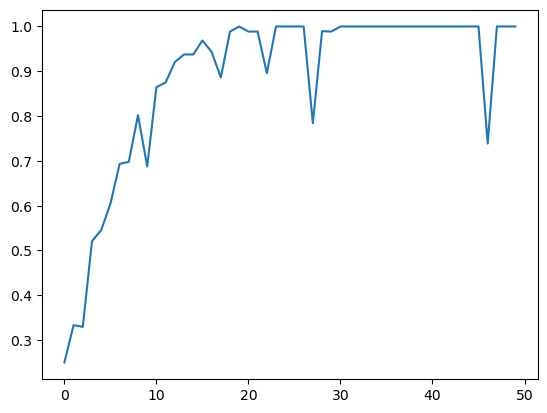

In [19]:
plt.plot(model_fit.history['accuracy'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

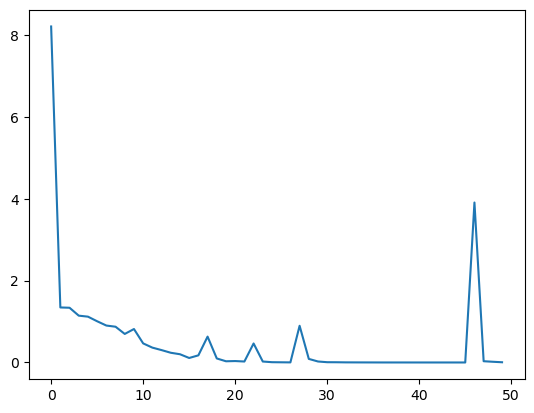

In [20]:
plt.plot(model_fit.history['loss'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

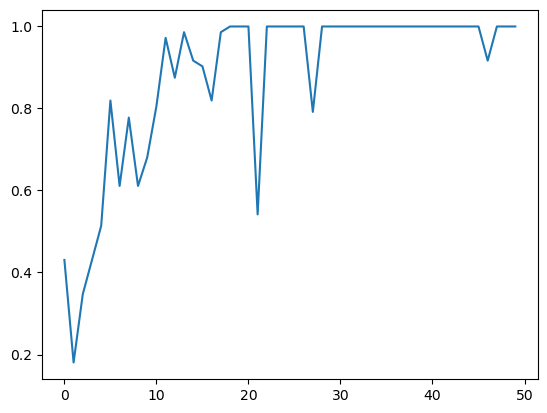

In [21]:
plt.plot(model_fit.history['val_accuracy'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

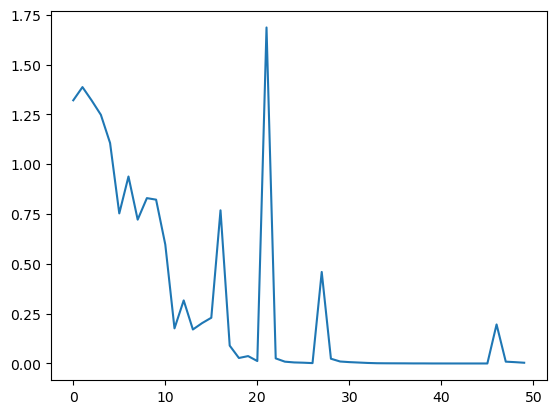

In [22]:
plt.plot(model_fit.history['val_loss'])
plt.show

In [23]:
from tensorflow.keras.models import load_model
model = load_model('vehical_type.model')
score = model.evaluate(train_dataset)
print('Val loss:', score[0])
print('val accuracy:', score[1])


17/17 [==============================] - 1s 61ms/step - loss: 0.0036 - accuracy: 1.0000
Val loss: 0.003588710678741336
val accuracy: 1.0


In [24]:
score = model.evaluate(test_dataset)
print('loss:', score[0])
print('accuracy:', score[1])



9/9 [==============================] - 1s 53ms/step - loss: 0.0034 - accuracy: 1.0000
loss: 0.0033847421873360872
accuracy: 1.0


C:\Users\Dell\AppData\Local\Temp\ipykernel_5576\127920066.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test_dataset)


Classification Report
              precision    recall  f1-score   support

    mini_van       1.00      1.00      1.00        30
      pickup       1.00      1.00      1.00        33
       sedan       1.00      1.00      1.00        21
         suv       1.00      1.00      1.00        46

    accuracy                           1.00       130
   macro avg       1.00      1.00      1.00       130
weighted avg       1.00      1.00      1.00       130



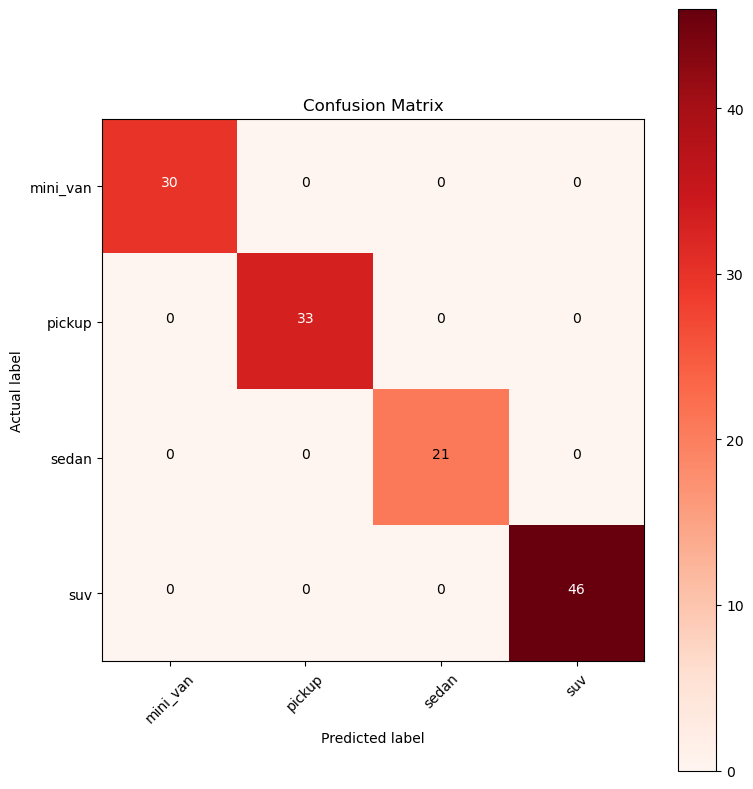

In [26]:
Y_pred = model.predict_generator(test_dataset)
y_pred = np.argmax(Y_pred, axis=1)
target_names = classes

cm = confusion_matrix(test_dataset.classes, y_pred)
cmap=plt.cm.Reds
plt.figure(figsize=(8,8))
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    
    plt.text(j, i, cm[i, j],
    horizontalalignment="center",
    color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

print('Classification Report')
print(classification_report(test_dataset.classes,y_pred,target_names=target_names))


In [27]:
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array
import numpy as np
import matplotlib.pyplot as plt
import os
import PIL.Image as Image

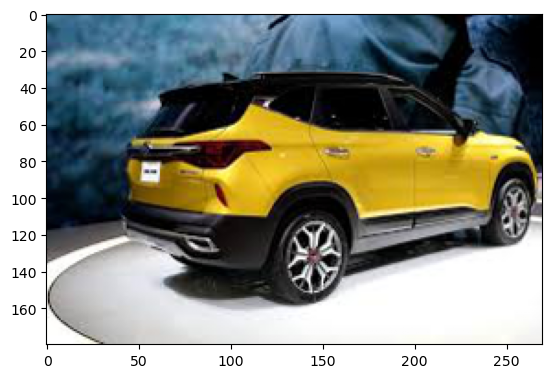

(180, 270, 3)
(1, 180, 270, 3)
(1, 180, 270, 3)
1/1 [==============================] - 0s 182ms/step
The Result is :  [[6.3959735e-05 8.2950019e-06 1.8327261e-06 9.9992585e-01]]
The car type is : suv


In [29]:
path = r"C:\Users\Dell\Yt_proj\Deep_learning\types\test\suv\suv48.jpg"
def prediction(path):
    global image,index
    image = Image.open(path).resize((270,180))
    image = (np.array(image)/255)
    plt.imshow(image)
    plt.show()
    print(image.shape)
    image = np.expand_dims(image,axis=0)
    print(image.shape)
    image = np.vstack([image])
    print(image.shape)
    model = tf.keras.models.load_model(r"C:\Users\Dell\Yt_proj\Deep_learning\vehical_type.model")
    prediction = model.predict(image)
    index = np.argmax(prediction)
    print("The Result is : ",prediction)
prediction(path)
if index == 0:
    print("The car type is : mini_van")
elif index == 1:
    print("The car type is : pickup")
elif index == 2:
     print("The car type is : sedan")
elif index == 3:
     print("The car type is : suv")
